In [102]:
import numpy as np
import pandas as pd
import plotnine as p
import matplotlib.pyplot as plt
from mizani.transforms import trans, trans_new
from statsmodels.formula.api import ols
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

In [103]:
df = pd.read_csv('Data - Sheet1.csv')

In [113]:
df.shape

(43, 7)

In [104]:
df

,Date,Time,Standard,Priority,Estimated
0,230315,Morning,8,6,5
1,230315,Afternoon,6,5,3
2,230316,Morning,5,4,3
3,230316,Afternoon,11,6,7
4,230320,Morning,4,3,3
5,230320,Afternoon,16,5,3
6,230321,Morning,5,4,9
7,230321,Morning,5,4,3
8,230321,Morning,5,4,13
9,230321,Afternoon,11,10,15


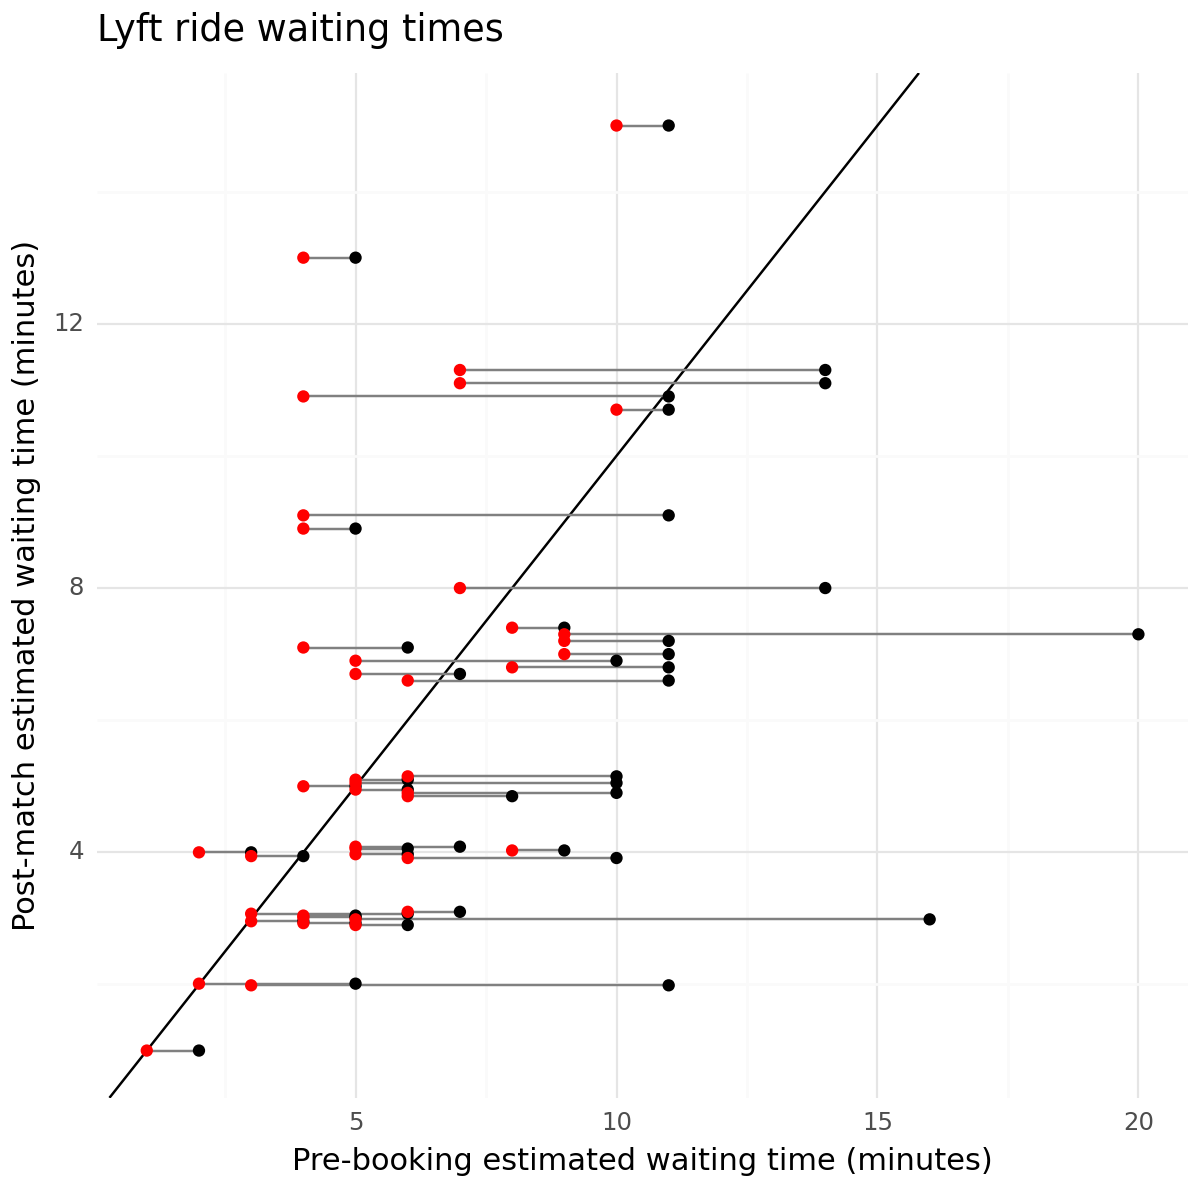

In [105]:
p.options.figure_size = 6, 6

p_ = (
    p.ggplot(p.aes(y = 'Standard', x = 'Estimated'), df)
    + p.geom_abline()
    + p.geom_linerange(
        p.aes(ymin = 'Priority', ymax = 'Standard', x = 'Estimated'),
        position = p.position_dodge2(width = 0.2),
        color = 'grey'
    )
    + p.geom_point(position = p.position_dodge2(width = 0.2))
    + p.geom_point(p.aes(y = 'Priority'), color = 'r', position = p.position_dodge2(width = 0.2))
    + p.coord_flip()
    + p.theme_minimal()
    + p.labs(
        title = 'Lyft ride waiting times',
        y = 'Pre-booking estimated waiting time (minutes)',
        x = 'Post-match estimated waiting time (minutes)'
    )
)

p_.save('fig1.png', dpi = 300)

print(p_)

In [106]:
df = df.assign(standard_diff = df['Standard'] - df['Estimated'], priority_diff = df['Priority'] - df['Estimated'])

In [107]:
long_df = df[['standard_diff', 'priority_diff']].melt(var_name = 'service', value_name = 'minutes_difference')

In [108]:
long_df.head()

,service,minutes_difference
0,standard_diff,3
1,standard_diff,3
2,standard_diff,2
3,standard_diff,4
4,standard_diff,1


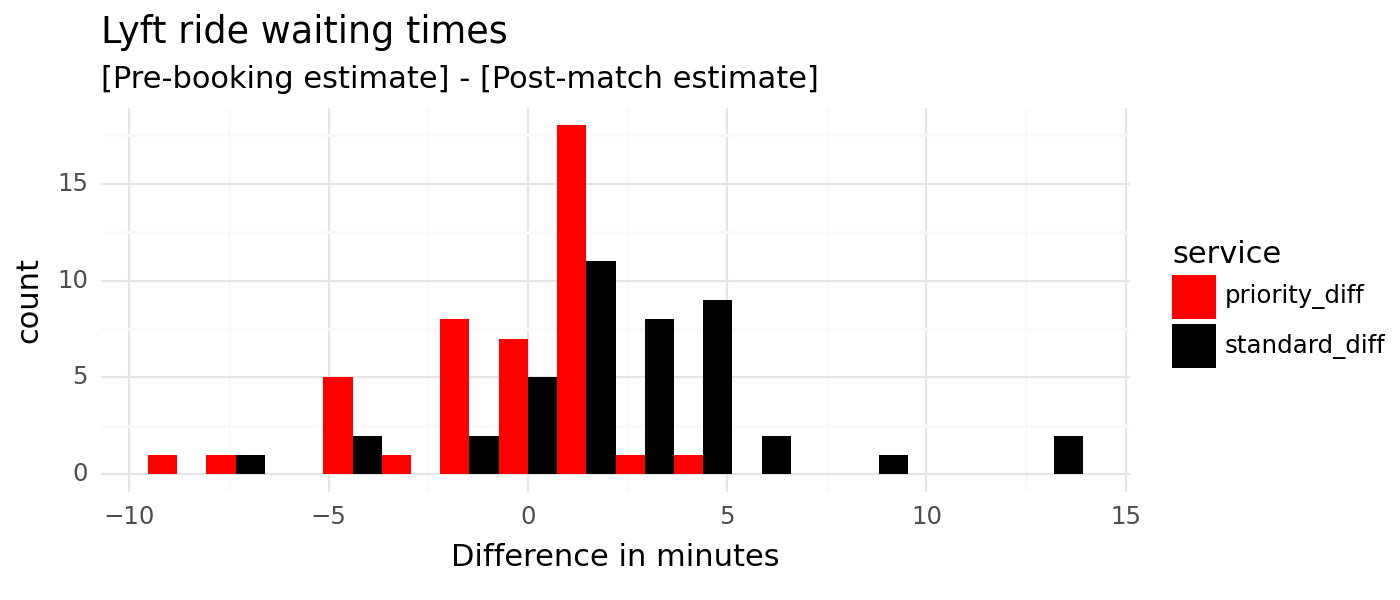

In [109]:
p.options.figure_size = 7, 3

p_ = (
    p.ggplot(p.aes(x = 'minutes_difference', fill = 'service'), long_df)
    + p.geom_histogram(bins = 16, position = 'dodge')
    + p.scale_fill_manual({'standard_diff': 'black', 'priority_diff': 'red'})
    + p.theme_minimal()
    + p.labs(
        title = 'Lyft ride waiting times',
        subtitle = '[Pre-booking estimate] - [Post-match estimate]',
        x = 'Difference in minutes'
    )
)

p_.save('fig2.png', dpi = 300)

print(p_)

In [110]:
ols('minutes_difference ~ 0 + service', long_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     minutes_difference   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     19.21
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           3.36e-05
Time:                        21:02:02   Log-Likelihood:                -222.96
No. Observations:                  86   AIC:                             449.9
Df Residuals:                      84   BIC:                             454.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
service[priority_diff]    -0.5116      0.499     -1.025      0.308      -1.504       0.481
service[standard_diff]     2.5814      0.499      5.174      0.000       1.589       3.574
==============================================================================
Omnibus:                        9.558   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               22.988
Skew:                          -0.092   Prob(JB):                     1.02e-05
Kurtosis:                       5.526   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
ols('minutes_difference ~ service', long_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     minutes_difference   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     19.21
Date:                Tue, 19 Sep 2023   Prob (F-statistic):           3.36e-05
Time:                        21:02:02   Log-Likelihood:                -222.96
No. Observations:                  86   AIC:                             449.9
Df Residuals:                      84   BIC:                             454.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.5116      0.499     -1.025      0.308      -1.504       0.481
service[T.standard_diff]     3.0930      0.706      4.383      0.000       1.690       4.496
==============================================================================
Omnibus:                        9.558   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               22.988
Skew:                          -0.092   Prob(JB):                     1.02e-05
Kurtosis:                       5.526   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
df[['standard_diff', 'priority_diff']].median()

standard_diff    3.0
priority_diff    0.0
dtype: float64